<a href="https://colab.research.google.com/github/jackiechen24/dropoutbias/blob/main/Chen_Jackie_DSCI_531_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSCI 531 Project Code
## Installations and Importing the Dataset
The "Predict Students' Dropout and Academic Success" dataset from the UC Irvine Machine Learning Repository (https://doi.org/10.24432/C5MC89) provided information on how to install and import this dataset.

In [1]:
!pip install ucimlrepo  # Install the ucimlrepo package

# Import dataset into code
from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)

{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [2]:
# viewing the first 5 and last 5 rows of the data
predict_students_dropout_and_academic_success

{'data': {'ids': None,
  'features':       Marital Status  Application mode  Application order  Course  \
  0                  1                17                  5     171   
  1                  1                15                  1    9254   
  2                  1                 1                  5    9070   
  3                  1                17                  2    9773   
  4                  2                39                  1    8014   
  ...              ...               ...                ...     ...   
  4419               1                 1                  6    9773   
  4420               1                 1                  2    9773   
  4421               1                 1                  1    9500   
  4422               1                 1                  1    9147   
  4423               1                10                  1    9773   
  
        Daytime/evening attendance  Previous qualification  \
  0                              1              

In [3]:
X  # view the features dataframe

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [4]:
X.isna().sum() # check for missing values

,0
Marital Status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


None of the columns appear to have any missing values.

In [5]:
int(X.duplicated().sum()) # check for duplicates

0

There do not appear to be any duplicate values.

In [6]:
y # view the target dataframe

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


## Target Distribution
We look at the distributions of the target variable based on several features (including gender, nationality, and age) to see how the distributions look for the target class for different values of the features (e.g. male vs female), if the distributions are imbalanced, what their ratio is, if this can lead to bias, etc.

Text(0.5, 1.0, 'Distribution of Target by Gender')

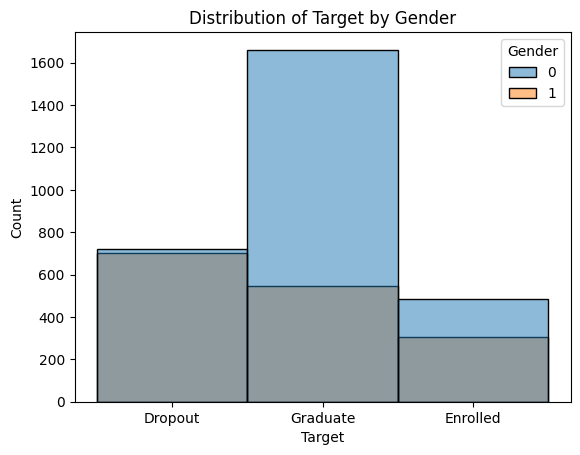

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
complete_df = pd.concat([X, y], axis=1) # combine the features and target dataframes
# distribution of target variable color coded by gender (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Target", hue="Gender")
plt.title('Distribution of Target by Gender')

In the histogram above, 1 is male, while 0 is female. The distribution of target by gender shows that there are fewer males compared to females for all values of the target variable. However, graduate is the most common value of target for female students, while dropout is the most common value of target for male students. For both male and female students, enrolled is the least common value of target. Below, we check the number of values for each gender and notice that female students have a higher count than male students.

In [14]:
X["Gender"].value_counts() # number of values for each gender (1 is male, 0 is female)

,count
Gender,
0,2868
1,1556


In [39]:
complete_df[["Gender", "Target"]].value_counts() # count of Gender and Target

Gender  Target  
0       Graduate    1661
        Dropout      720
1       Dropout      701
        Graduate     548
0       Enrolled     487
1       Enrolled     307
Name: count, dtype: int64

Since the values of the Target variable do not have similar values to each other and the values of the Target variable are not similarly distributed for both genders, there is a potential for bias.

Text(0.5, 1.0, 'Distribution of Target by Nationality')

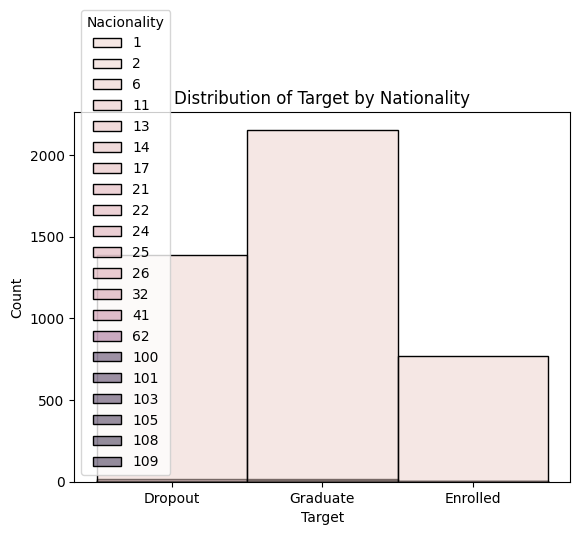

In [28]:
# distribution of target variable color coded by Nationality (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Target", hue="Nacionality")
plt.title('Distribution of Target by Nationality')

For the histogram above, 1 is Portuguese, 2 is German, 6 is Spanish, 11 is Italian, 13 is Dutch, 14 is English, 17 is Lithuanian, 21 is Angolan, 22 is Cape Verdean, 24 is Guinean, 25 is Mozambican, 26 is Santomean, 32 is Turkish, 41 is Brazilian, 62 is Romanian, 100 is Moldova (Republic of), 101 is Mexican, 103 is Ukrainian, 105 is Russian, 108 is Cuban, and 109 is Colombian. The distribution of target by nationality shows that the dataset consists of mostly students of Portuguese nationality. Graduate is the most common value for Portugues students, followed by dropout and enrolled. Below, we find the number of values for each nationality and find that the students in this dataset are predominantly Portuguese.

In [16]:
X["Nacionality"].value_counts() # number of values for each nationality

,count
Nacionality,
1,4314
41,38
26,14
6,13
22,13
24,5
100,3
11,3
103,3


In [41]:
complete_df[["Nacionality", "Target"]].value_counts() # count of Nationality and Target

Nacionality  Target  
1            Graduate    2155
             Dropout     1389
             Enrolled     770
41           Graduate      18
             Dropout       14
22           Graduate       8
26           Graduate       8
41           Enrolled       6
26           Enrolled       5
6            Enrolled       5
             Dropout        4
24           Graduate       4
6            Graduate       4
22           Dropout        4
11           Graduate       3
2            Graduate       2
100          Dropout        2
103          Graduate       2
21           Dropout        1
22           Enrolled       1
21           Enrolled       1
14           Graduate       1
13           Graduate       1
25           Graduate       1
26           Dropout        1
24           Dropout        1
25           Enrolled       1
17           Dropout        1
32           Enrolled       1
62           Graduate       1
             Enrolled       1
100          Enrolled       1
101          Dropout        1
             Graduate       1
103          Dropout        1
105          Dropout        1
             Enrolled       1
108          Enrolled       1
109          Dropout        1
Name: count, dtype: int64

Since the values of the Target variable do not have similar values to each other and the values of the Target variable are not similarly distributed for the nationalities (there are a lot more Portuguese students), there is a potential for bias.

Text(0.5, 1.0, 'Distribution of Nationality by Target')

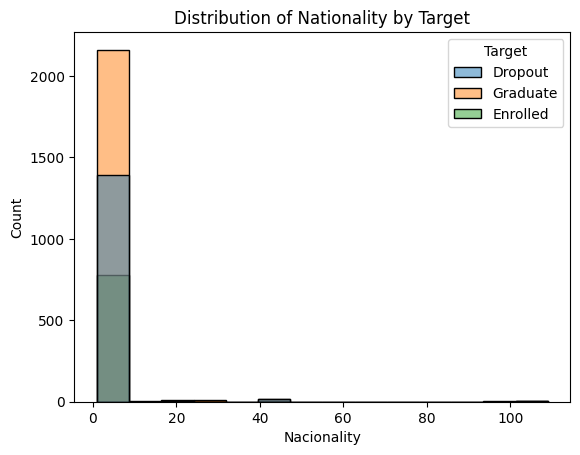

In [29]:
# distribution of Nationality color coded by target variable (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Nacionality", hue="Target")
plt.title('Distribution of Nationality by Target')

Portuguese is the most common value of Nationality, and this nationality shows that Graduate is the most common value for the target variable, followed by Dropout and Enrolled.

Text(0.5, 1.0, 'Distribution of Age at enrollment by Target')

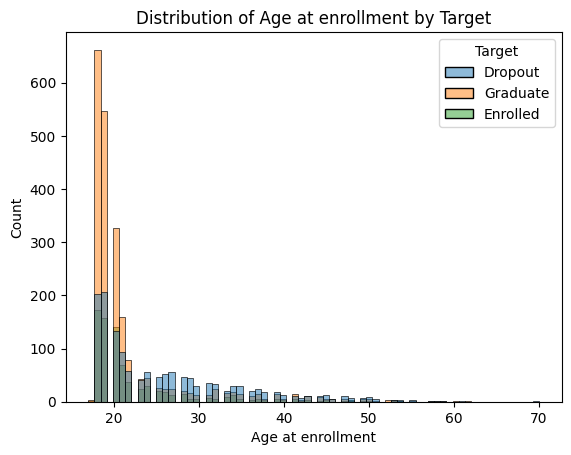

In [24]:
# distribution of Age at enrollment coded by target variable (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Age at enrollment", hue="Target")
plt.title('Distribution of Age at enrollment by Target')

Based on the distribution above, Graduate appears to be the most common value, followed by dropout and enrolled. Graduate appears to have a much higher count than dropout and enrolled, especially for students whose age at enrollment was 18 years old or 19 years old (and also for 20, 21, and 22 years old but to a lesser extent). There could be potential bias against higher ages (in addition to an age enrollment value of 17 years old) at enrollment due to these values for ages being less frequent.

In [43]:
complete_df[["Age at enrollment", "Target"]].value_counts() # count of Age at enrollment and Target

,,count
Age at enrollment,Target,
18,Graduate,662
19,Graduate,547
20,Graduate,326
19,Dropout,207
18,Dropout,202
...,...,...
58,Graduate,1
59,Graduate,1
61,Dropout,1


Text(0.5, 1.0, 'Distribution of Unemployement Rate by Target')

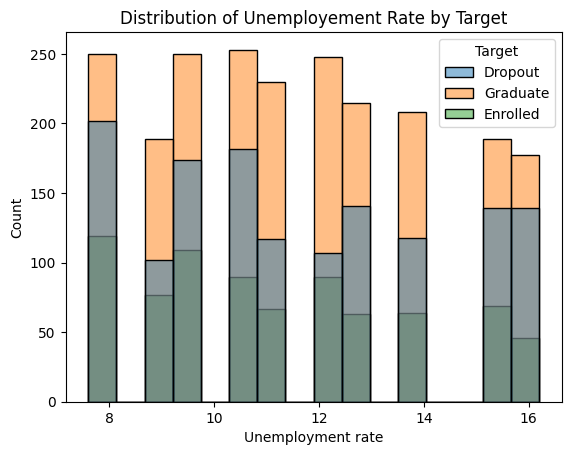

In [25]:
# distribution of target variable color coded by unemployment rate (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Unemployment rate", hue="Target")
plt.title('Distribution of Unemployement Rate by Target')

Based on the distribution above, Graduate is the most common value of Target, followed by Dropout and Enrolled. There could be potential bias against the Dropout and Enrolled values of the target variable since they occur less frequently than the Graduate value of the target variable.


In [42]:
complete_df[["Unemployment rate", "Target"]].value_counts() # count of Unemployment rate and Target

,,count
Unemployment rate,Target,
10.8,Graduate,253
7.6,Graduate,250
9.4,Graduate,250
12.4,Graduate,248
11.1,Graduate,230
12.7,Graduate,215
13.9,Graduate,208
7.6,Dropout,202
8.9,Graduate,189


Text(0.5, 1.0, 'Distribution of Inflation Rate by Target')

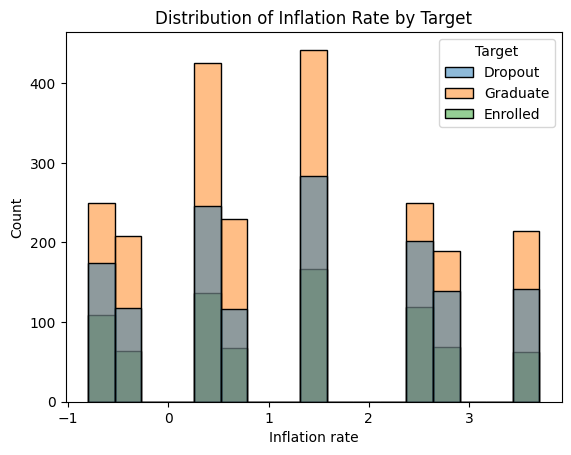

In [26]:
# distribution of target variable color coded by inflation rate (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Inflation rate", hue="Target")
plt.title('Distribution of Inflation Rate by Target')

Based on the distribution above, Graduate is the most common value of Target, followed by Dropout and Enrolled. The most common inflation rate value seems to be between 0% and 2% and so there could be potential bias against Inflation rate values that are lower than this range of Inflation rate values.


In [44]:
complete_df[["Inflation rate", "Target"]].value_counts() # count of Inflation rate and Target

Inflation rate  Target  
 1.4            Graduate    442
                Dropout     284
-0.8            Graduate    250
 2.6            Graduate    250
 0.5            Graduate    248
 0.6            Graduate    230
 3.7            Graduate    215
-0.3            Graduate    208
 2.6            Dropout     202
 2.8            Graduate    189
 0.3            Graduate    177
-0.8            Dropout     174
 1.4            Enrolled    167
 3.7            Dropout     141
 2.8            Dropout     139
 0.3            Dropout     139
 2.6            Enrolled    119
-0.3            Dropout     118
 0.6            Dropout     117
-0.8            Enrolled    109
 0.5            Dropout     107
                Enrolled     90
 2.8            Enrolled     69
 0.6            Enrolled     67
-0.3            Enrolled     64
 3.7            Enrolled     63
 0.3            Enrolled     46
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of GDP by Target')

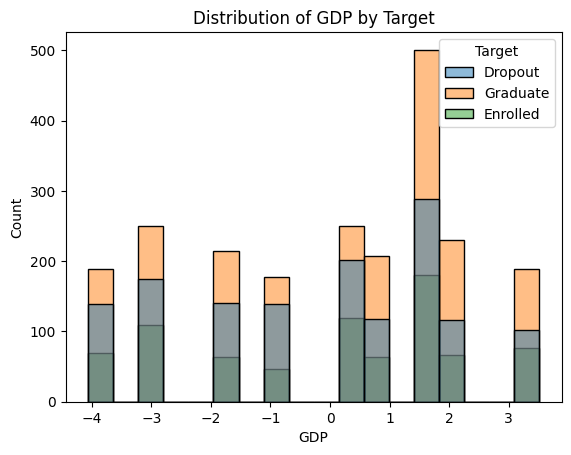

In [30]:
# distribution of target variable color coded by GDP (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="GDP", hue="Target")
plt.title('Distribution of GDP by Target')

For all values of GDP, the histogram above shows that Graduate is the most common value, followed by Dropout and Enrolled. Most GDP values are between 1 and 2, and these values of GDP seem to show a higher proportion of the Graduate value for the Target variable compared to other values of GDP. There could also be bias against these other values of GDP due to them being less frequent in the dataset.

In [45]:
complete_df[["GDP", "Target"]].value_counts() # count of GDP and Target

,,count
GDP,Target,
1.74,Graduate,253
-3.12,Graduate,250
0.32,Graduate,250
1.79,Graduate,248
2.02,Graduate,230
-1.70,Graduate,215
0.79,Graduate,208
0.32,Dropout,202
3.51,Graduate,189


Text(0.5, 1.0, 'Distribution of Target by Course')

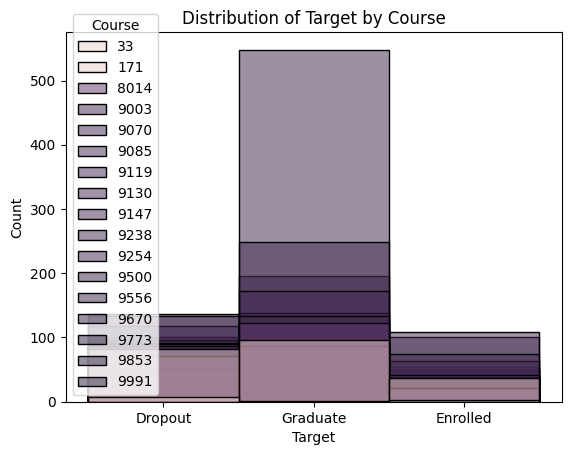

In [33]:
# distribution of target variable color coded by Course (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Target", hue="Course")
plt.title('Distribution of Target by Course')

In [34]:
X["Course"].value_counts() # number of values for each course

,count
Course,
9500,766
9147,380
9238,355
9085,337
9773,331
9670,268
9991,268
9254,252
9070,226


Text(0.5, 1.0, 'Distribution of Course by Target')

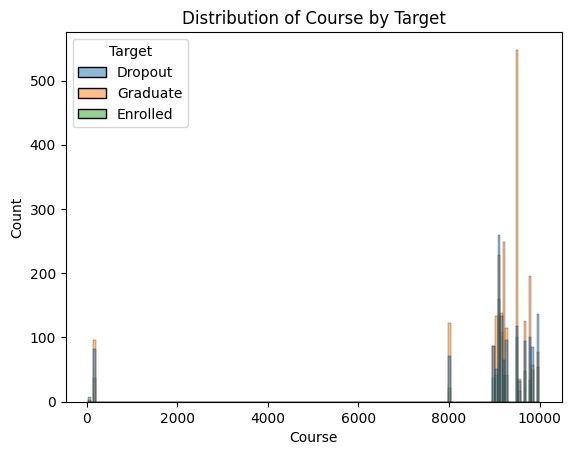

In [35]:
# distribution of Course color coded by Target (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Course", hue="Target")
plt.title('Distribution of Course by Target')

For most courses, Graduate has the highest count for the target variable, followed by Dropout and Enrolled, but for a few courses, Dropout appears to have the highest count for the target variable. Course 9500 (Nursing) has the highest count, followed by Courses 9147 (Management), 9238 (Social Service), 9085 (Veterinary Nursing), and 9773 (Journalism and Communication). There could be potential bias against courses with less students due to these values occurring less frequently in the dataset.

In [46]:
complete_df[["Course", "Target"]].value_counts() # count of Course and Target

,,count
Course,Target,
9500,Graduate,548
9238,Graduate,248
9773,Graduate,196
9085,Graduate,172
9147,Graduate,138
9991,Dropout,136
9147,Dropout,134
9070,Graduate,133
9670,Graduate,125


Text(0.5, 1.0, 'Distribution of Target by Marital Status')

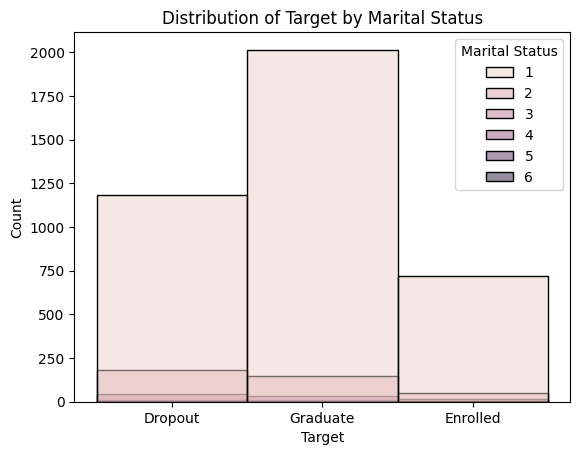

In [36]:
# distribution of target variable color coded by Marital Status (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Target", hue="Marital Status")
plt.title('Distribution of Target by Marital Status')

In the histogram above, 1 is single, 2 is married, 3 is widower, 4 is divorced, 5 is facto union, and 6 is legally separated. Most students have a marital status of single, where the most common value of the target variable is Graduate, followed by Dropout and Enrolled. However, the same cannot be said for students of other marital statuses, such as married students and divorced students where dropout is the highest (this is also shown in the histogram below).

Text(0.5, 1.0, 'Distribution of Marital Status by Target')

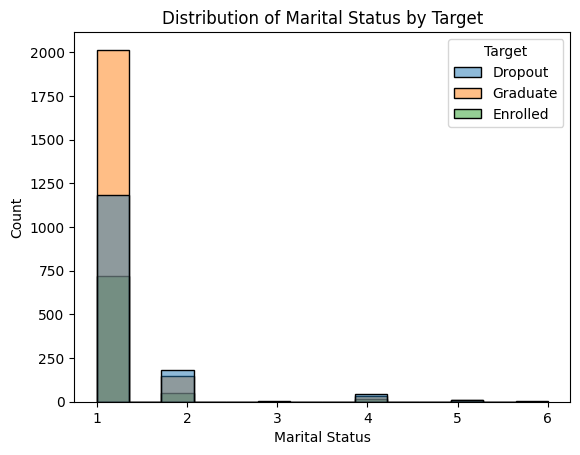

In [37]:
# distribution of Marital Status color coded by target variable (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Marital Status", hue="Target")
plt.title('Distribution of Marital Status by Target')

There could be potential bias against less common Marital Status values (widower, facto union, and legally separated are the least common Marital statuses), as these values occur less frequently in the dataset.

In [47]:
complete_df[["Marital Status", "Target"]].value_counts() # count of Marital Status and Target

Marital Status  Target  
1               Graduate    2015
                Dropout     1184
                Enrolled     720
2               Dropout      179
                Graduate     148
                Enrolled      52
4               Dropout       42
                Graduate      33
                Enrolled      16
5               Dropout       11
                Graduate      11
6               Dropout        4
5               Enrolled       3
3               Enrolled       2
                Graduate       1
                Dropout        1
6               Enrolled       1
                Graduate       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Target by Daytime/evening attendance')

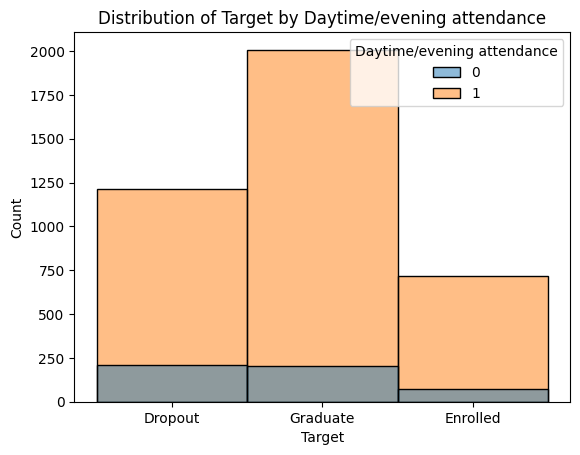

In [38]:
# distribution of target variable color coded by Daytime/evening attendance (https://seaborn.pydata.org/generated/seaborn.histplot.html)
sns.histplot(data=complete_df, x="Target", hue="Daytime/evening attendance")
plt.title('Distribution of Target by Daytime/evening attendance')

In the distribution above, 1 is daytime and 0 is evening. Daytime attendance students have higher counts for all values of the target variable than evening attendance students. Daytime attendance students have the highest count in the Graduate value of Target, followed by Dropout and Enrolled. Meanwhile, evening attendance students have similar values for the Dropout and Graduate values of Target (with Dropout being slightly higher - this is more clear in the code below, where the count of Daytime and evening attendance and the Target variable is shown), while the value for Enrolled is lower than the values for Dropout and Graduate. Since there are less evening attendance students, there could potentially be bias against this group of students.

In [48]:
complete_df[["Daytime/evening attendance", "Target"]].value_counts() # count of Daytime/evening attendance and Target

Daytime/evening attendance  Target  
1                           Graduate    2008
                            Dropout     1214
                            Enrolled     719
0                           Dropout      207
                            Graduate     201
                            Enrolled      75
Name: count, dtype: int64

## Model Training
We implement various machine learning models such as logistic regression, random forest/balanced random forest, XGBoost, and neural networks to predict student dropout. We may also try comparing their performance and record any differences in bias mitigation in these different algorithms. We split the data into training and testing sets (e.g. 70\% train, 30\% test) and employ k-fold cross-validation to ensure model robustness.

In [63]:
# split the data into train and test sets (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
from sklearn.model_selection import train_test_split
# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# employ k-fold cross-validation (https://www.geeksforgeeks.org/cross-validation-using-k-fold-with-scikit-learn/)
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

# implement logistic regression, random forest/balanced random forest, XGBoost, and neural networks models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# create logistic regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train) # fit the model
# Make predictions and evaluate
log_y_pred = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_y_pred))

# create random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train) # fit the model
# Make predictions and evaluate
rf_y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))

# create balanced random forest model (https://medium.com/@fadleemt/balanced-random-forest-d5dc9c896bb4)
brf_model = BalancedRandomForestClassifier(random_state=42)
brf_model.fit(X_train, y_train) # fit the model
# Make predictions and evaluate
brf_y_pred = brf_model.predict(X_test)

print("Balanced Random Forest Accuracy:", accuracy_score(y_test, brf_y_pred))
print("Balanced Random Forest Classification Report:\n", classification_report(y_test, brf_y_pred))

# initialize LabelEncoder (XGBoost requires target variable to be numerical)
le = LabelEncoder() # https://xgboosting.com/label-encode-categorical-target-variable-for-xgboost/
# Fit and transform the target variable
y_train_encoded = le.fit_transform(y_train)
# create XGBoost model (https://www.projectpro.io/recipes/use-xgboost-classifier-and-regressor-in-python)
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_encoded) # fit the model
# make predictions and transform labels back to original encoding to evaluate
xgb_y_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, le.inverse_transform(xgb_y_pred)))
print("XGBoost Classification Report:\n", classification_report(y_test, le.inverse_transform(xgb_y_pred)))

# create neural network model (https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/)
nn_model = Sequential()
nn_model.add(Dense(100, input_shape=(36,), activation='relu'))
nn_model.add(Dense(3, activation='softmax'))
# compile model
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit and transform target variable
y_test_encoded = le.fit_transform(y_test)
# convert integer labels to one-hot encoded vectors (https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical)
y_train_vec = to_categorical(y_train_encoded, num_classes = 3)
y_test_vec = to_categorical(y_test_encoded, num_classes = 3)
history = nn_model.fit(X_train, y_train_vec, validation_data=(X_test, y_test_vec), epochs=300, verbose=0) # fit the model
# evaluate the model
_, train_accuracy = nn_model.evaluate(X_train, y_train_vec, verbose=0)
_, test_accuracy = nn_model.evaluate(X_test, y_test_vec, verbose=0)
print('Neural Network Training Data Accuracy: %.3f, Neural Network Test Accuracy: %.3f' % (train_accuracy, test_accuracy))
nn_yhat_probs = nn_model.predict(X_test, verbose=0) # predict probabilities for test set
y_test_vec = np.argmax(y_test_vec, axis=1) # get class labels of the one-hot encoded y_test_vec vector
# predict classes for test set (https://stackoverflow.com/questions/68776790/model-predict-classes-is-deprecated-what-to-use-instead)
nn_yhat_classes = np.argmax(nn_yhat_probs, axis=1)
print("Neural Network Classification Report:\n", classification_report(y_test_vec, nn_yhat_classes))
# ROC AUC for Neural Network
nn_auc = roc_auc_score(y_test_vec, nn_yhat_probs, multi_class='ovr')
print('ROC AUC for Neural Network: %f' % nn_auc)
# Neural Network confusion matrix
nn_matrix = confusion_matrix(y_test_vec, nn_yhat_classes)
print("Neural Network Confusion Matrix")
print(nn_matrix)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6701807228915663
Logistic Regression Classification Report:
               precision    recall  f1-score   support

     Dropout       0.75      0.63      0.68       441
    Enrolled       0.42      0.05      0.09       245
    Graduate       0.65      0.94      0.77       642

    accuracy                           0.67      1328
   macro avg       0.60      0.54      0.51      1328
weighted avg       0.64      0.67      0.61      1328



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy: 0.759789156626506
Random Forest Classification Report:
               precision    recall  f1-score   support

     Dropout       0.80      0.79      0.79       441
    Enrolled       0.54      0.29      0.37       245
    Graduate       0.77      0.92      0.84       642

    accuracy                           0.76      1328
   macro avg       0.71      0.66      0.67      1328
weighted avg       0.74      0.76      0.74      1328



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Balanced Random Forest Accuracy: 0.7620481927710844
Balanced Random Forest Classification Report:
               precision    recall  f1-score   support

     Dropout       0.84      0.74      0.79       441
    Enrolled       0.49      0.57      0.53       245
    Graduate       0.83      0.85      0.84       642

    accuracy                           0.76      1328
   macro avg       0.72      0.72      0.72      1328
weighted avg       0.77      0.76      0.77      1328



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBoost Accuracy: 0.7725903614457831
XGBoost Classification Report:
               precision    recall  f1-score   support

     Dropout       0.83      0.77      0.80       441
    Enrolled       0.58      0.43      0.49       245
    Graduate       0.79      0.91      0.84       642

    accuracy                           0.77      1328
   macro avg       0.73      0.70      0.71      1328
weighted avg       0.76      0.77      0.76      1328



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Neural Network Training Data Accuracy: 0.790, Neural Network Test Accuracy: 0.742
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       441
           1       0.47      0.19      0.27       245
           2       0.77      0.90      0.83       642

    accuracy                           0.74      1328
   macro avg       0.66      0.64      0.63      1328
weighted avg       0.71      0.74      0.71      1328

ROC AUC for Neural Network: 0.863776
Neural Network Confusion Matrix
[[362  20  59]
 [ 89  46 110]
 [ 32  32 578]]
